In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [4]:
# Load dataset
df = pd.read_csv("imdb.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# Check for missing values
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [8]:
# Convert sentiment labels to binary (0 for negative, 1 for positive)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

C:\Users\mkadi\AppData\Local\Temp\ipykernel_8100\245405440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='coolwarm')


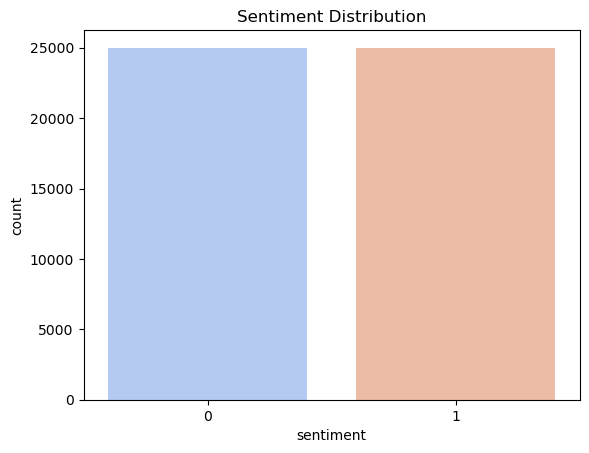

In [10]:
# Visualizing class distribution
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

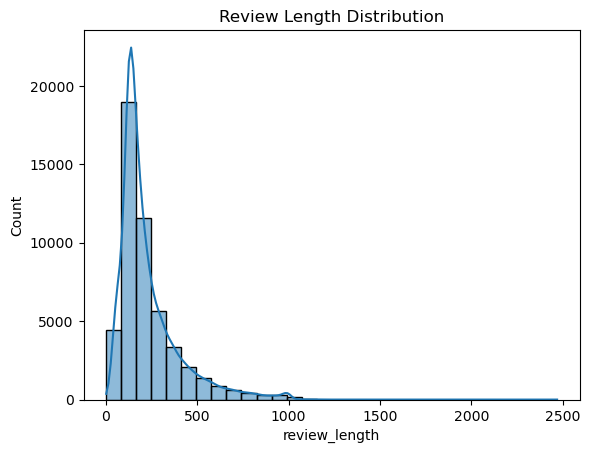

In [12]:
# Review length analysis
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Review Length Distribution")
plt.show()

In [14]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mkadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mkadi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mkadi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove special characters and lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing (Fast using .apply())
df['processed_review'] = df['review'].astype(str).apply(preprocess_text)

In [18]:
# Use TF-IDF for vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit features for speed
X = vectorizer.fit_transform(df['processed_review'])
y = df['sentiment']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [22]:
# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200, n_jobs=-1),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1)
}

In [24]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))# Train and evaluate models


Naive Bayes Accuracy: 0.8499
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Logistic Regression Accuracy: 0.8826
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

SVM Accuracy: 0.8821
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.

C:\Users\mkadi\AppData\Local\Temp\ipykernel_8100\3128186903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sentiment'], y=df['review_length'], palette='coolwarm')


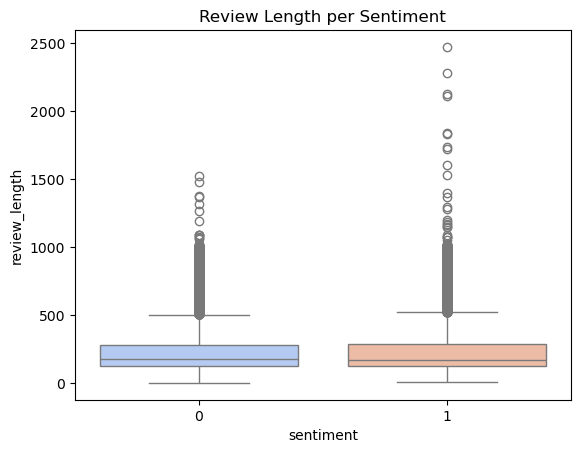

In [47]:
# Average word count per sentiment
sns.boxplot(x=df['sentiment'], y=df['review_length'], palette='coolwarm')
plt.title("Review Length per Sentiment")
plt.show()

C:\Users\mkadi\AppData\Local\Temp\ipykernel_8100\2041425946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')


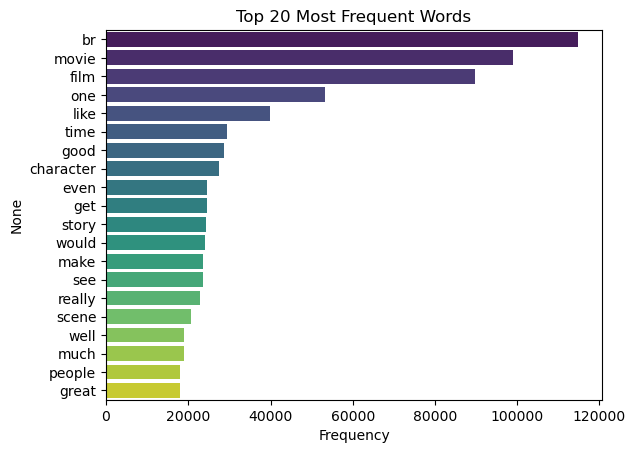

In [51]:
# Most frequent words
word_freq = pd.Series(' '.join(df['processed_review']).split()).value_counts()[:20]
sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.show()

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [30]:
# Tokenization
tokenizer = Tokenizer(num_words=3000)  # Reduce vocab size for speed
tokenizer.fit_on_texts(df['processed_review'])
X_seq = tokenizer.texts_to_sequences(df['processed_review'])
X_pad = pad_sequences(X_seq, maxlen=200)  # Standardize input size

In [32]:
# Train-test split
X_train_pad, X_test_pad, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


In [34]:
# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=3000, output_dim=128, input_length=200),
    LSTM(64, return_sequences=True),
    LSTM(32),  # Reduce LSTM size for faster training
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\mkadi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
# Use Early Stopping to prevent overfitting and reduce training time
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stop])


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 75ms/step - accuracy: 0.7779 - loss: 0.4514 - val_accuracy: 0.8683 - val_loss: 0.3090
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 71ms/step - accuracy: 0.8854 - loss: 0.2872 - val_accuracy: 0.8771 - val_loss: 0.2902
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 70ms/step - accuracy: 0.9074 - loss: 0.2364 - val_accuracy: 0.8780 - val_loss: 0.3036
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 70ms/step - accuracy: 0.9236 - loss: 0.1988 - val_accuracy: 0.8763 - val_loss: 0.2987


In [39]:
# Evaluate
lstm_pred = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")
print("LSTM Model Accuracy:", accuracy_score(y_test, lstm_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
LSTM Model Accuracy: 0.8771


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


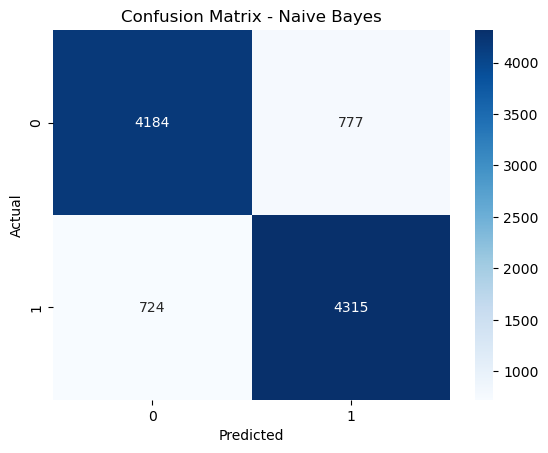

In [59]:
# Plot for Naive Bayes
y_pred_nb = models["Naive Bayes"].predict(X_test)
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

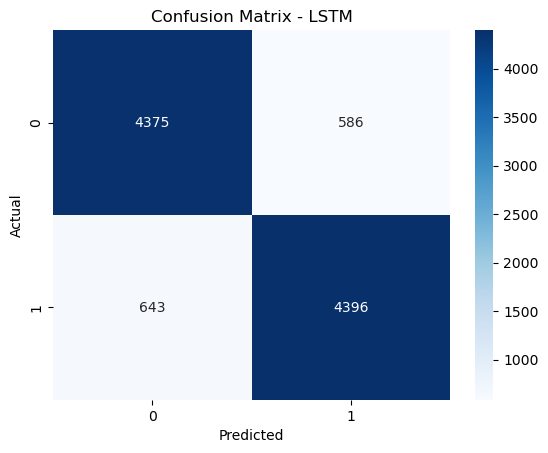

In [61]:
# Plot for LSTM
plot_confusion_matrix(y_test, lstm_pred, "LSTM")